In [31]:
import pandas as pd
def load_data():
  url="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
  html=pd.read_html(url,header=0)
  df=html[0] #This selects the first table from the web page
  return df

In [32]:
df=load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


# Analysing Features

In [33]:
sector_unique=df["GICS Sector"].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [34]:
len(sector_unique)

11

# Lets Groupby Sector

In [35]:
sector=df.groupby("GICS Sector")
sector.first() #shows the details of the first company in each sector

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group Inc,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,Apache Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,AFLAC Inc,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M Company,reports,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture plc,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals Inc,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [36]:
sector.describe()

CIK                ...                       
                       count          mean  ...         75%        max
GICS Sector                                 ...                       
Communication Services  26.0  1.115660e+06  ...  1532807.75  1754301.0
Consumer Discretionary  62.0  8.224900e+05  ...  1149283.75  1585689.0
Consumer Staples        32.0  3.872794e+05  ...   789573.00  1679273.0
Energy                  25.0  8.090254e+05  ...  1358071.00  1701605.0
Financials              65.0  6.313738e+05  ...  1120193.00  1601712.0
Health Care             63.0  7.855973e+05  ...  1092214.50  1792044.0
Industrials             73.0  6.572375e+05  ...  1060391.00  1783180.0
Information Technology  73.0  9.024073e+05  ...  1336920.00  1786842.0
Materials               28.0  8.369064e+05  ...  1419355.00  1755672.0
Real Estate             30.0  9.005619e+05  ...  1052997.75  1393311.0
Utilities               28.0  8.035041e+05  ...  1036121.50  1711269.0

[11 rows x 8 columns]

#Lets see all the company belonging to healthcare sector

In [37]:
sector.get_group("Health Care")

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
472,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
483,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
487,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data

In [38]:
!pip install yfinance

In [39]:
import yfinance as yf

In [40]:
list(df.Symbol)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP

**Downloading Data Of Stock Prices Using YFinance**

In [41]:
data=yf.download(
    
              tickers=list(df.Symbol),

              # use "period" instead of start/end
              # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
              # (optional, default is '1mo')
              #This converts years to date
              period = "ytd",

              # fetch data by interval (including intraday if period < 60 days)
              # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
              # (optional, default is '1d')
              interval = "1d",

              # group by ticker (to access via data['SPY'])
              # (optional, default is 'column')
              group_by = 'ticker',

              # adjust all OHLC automatically
              # (optional, default is False)
              auto_adjust = True,

              # download pre/post regular market hours data
              # (optional, default is False)
              prepost = True,

              # use threads for mass downloading? (True/False/Integer)
              # (optional, default is True)
              threads = True,

              # proxy URL scheme use use when downloading?
              # (optional, default is None)
              proxy = None
             
              )

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [42]:
data

APH                          ...         ZTS                     
                  Open        High         Low  ...         Low       Close   Volume
Date                                            ...                                 
2021-01-04  130.919998  132.029999  127.779999  ...  160.720001  163.589996  1805900
2021-01-05  128.839996  131.399994  128.350006  ...  162.500000  164.729996  1358600
2021-01-06  131.089996  134.809998  131.089996  ...  162.669998  167.149994  2139800
2021-01-07  135.000000  136.449997  134.000000  ...  166.699997  167.000000  1710700
2021-01-08  136.500000  137.179993  133.919998  ...  166.690002  168.110001  1475900

[5 rows x 2527 columns]

#Lets Make Date One Of The Columns

In [43]:
tempdf=pd.DataFrame(data["ABT"].Close) #its the close price
tempdf["Date"]=tempdf.index
tempdf

,Close,Date
Date,,
2021-01-04,109.110001,2021-01-04
2021-01-05,110.459999,2021-01-05
2021-01-06,110.230003,2021-01-06
2021-01-07,111.300003,2021-01-07
2021-01-08,111.610001,2021-01-08


#Plotting Closing Price Of The Symbols

Text(0, 0.5, 'Closing price')

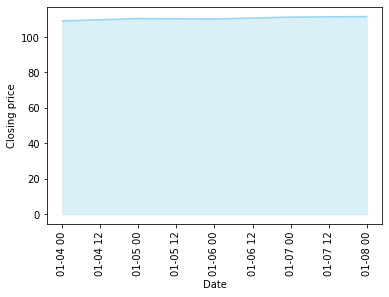

In [44]:
import matplotlib.pyplot as plt

plt.fill_between(tempdf.Date,tempdf.Close,color="skyblue",alpha=0.3)
plt.plot(tempdf.Date,tempdf.Close,color="skyblue",alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing price")

# Lets make a general function that will give us plot when it receives the ticker function(symbol)

In [45]:
import matplotlib.pyplot as plt

def price_plot(symbol):
  df=pd.DataFrame(data[symbol].Close)
  df["Date"]=df.index

  plt.fill_between(df.Date,df.Close,color="skyblue",alpha=0.3)
  plt.plot(df.Date,df.Close,color="skyblue",alpha=0.8)
  plt.xticks(rotation=90)
  plt.xlabel("Date")
  plt.ylabel("Closing price")

  return plt.show()

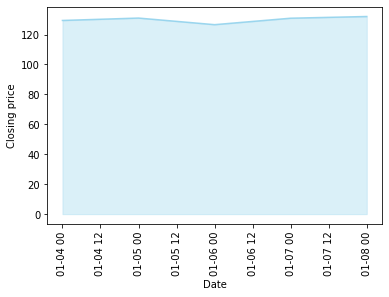

In [46]:
price_plot("AAPL")

#We need to update df cuz in the middle we have changed it

In [47]:
df=load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


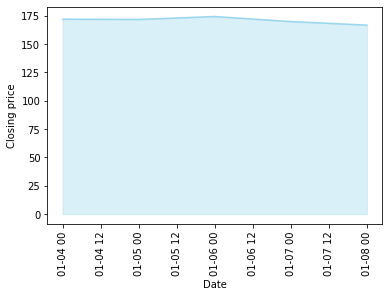

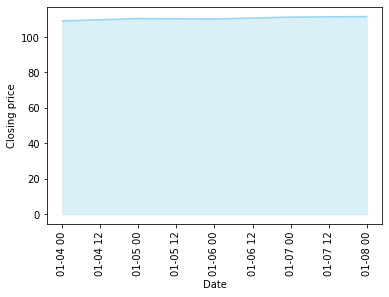

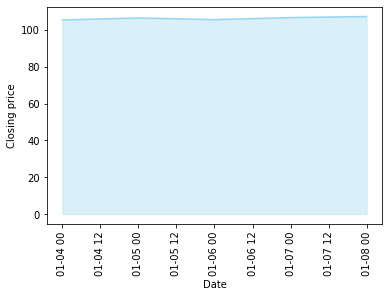

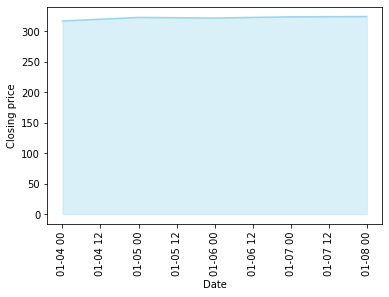

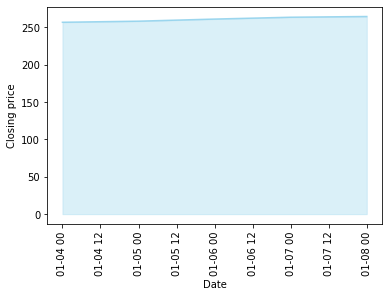

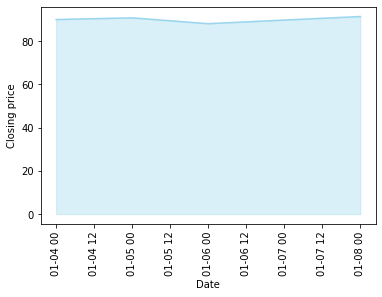

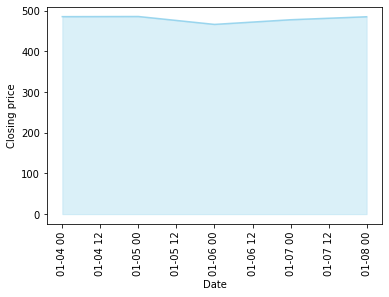

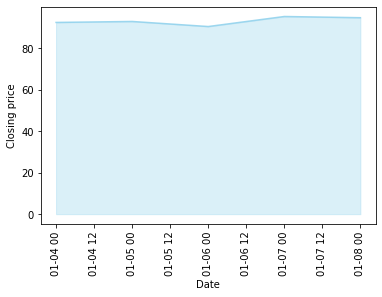

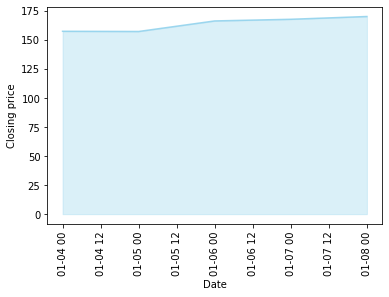

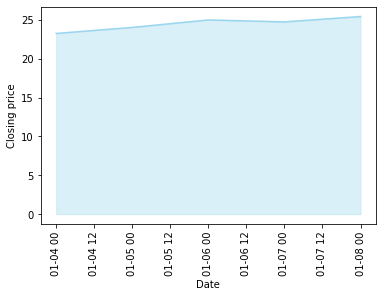

In [48]:
#stock plot first 10 company names using for loop
!pip install yfinance
import yfinance as yf
for i in list(df.Symbol)[:10]:
  price_plot(i)